## Analyse the performance of preliminary model based on different threshold

In [1]:
from matplotlib import pyplot as plt
import pandas as pd

In [2]:
threshold_70 = {'training': {'MSE': 49.58, 'MAPE': 0.06, 'MAE': 4.95, 'R2': 0.64},
          'testing': {'MSE': 61.73, 'MAPE': 0.07, 'MAE': 6.00, 'R2': 0.50}}

threshold_80 = {'training': {'MSE': 50.98, 'MAPE': 0.06, 'MAE': 4.95, 'R2': 0.63},
          'testing': {'MSE': 57.07, 'MAPE': 0.07, 'MAE': 5.82, 'R2': 0.54}}

threshold_85 = {'training': {'MSE': 43.19, 'MAPE': 0.05, 'MAE': 4.54, 'R2': 0.68},
          'testing': {'MSE': 50.51, 'MAPE': 0.07, 'MAE': 5.56, 'R2': 0.59}}

threshold_90 = {'training': {'MSE': 44.58, 'MAPE': 0.06, 'MAE': 4.61, 'R2': 0.67},
          'testing': {'MSE': 50.07, 'MAPE': 0.07, 'MAE': 5.53, 'R2': 0.59}}

performance = {70: threshold_70, 80: threshold_80, 85: threshold_85, 90: threshold_90}
performance_df = pd.DataFrame()

for threshold, data in performance.items():
    df_wide = pd.DataFrame.from_dict(data, orient='index').reset_index()
    df_long = (
        df_wide.melt(
            id_vars='index',
            var_name='indicator',
            value_name='value'
        )
        .assign(threshold=threshold)
        .rename(columns={'index': 'data type'})
    )
    performance_df = pd.concat([performance_df, df_long], ignore_index=True)

print(performance_df.index, performance_df.columns)
performance_df

RangeIndex(start=0, stop=32, step=1) Index(['data type', 'indicator', 'value', 'threshold'], dtype='object')


,data type,indicator,value,threshold
0,training,MSE,49.58,70
1,testing,MSE,61.73,70
2,training,MAPE,0.06,70
3,testing,MAPE,0.07,70
4,training,MAE,4.95,70
5,testing,MAE,6.00,70
6,training,R2,0.64,70
7,testing,R2,0.50,70
8,training,MSE,50.98,80
9,testing,MSE,57.07,80


In [3]:
indicators = performance_df['indicator'].unique()
indicators

array(['MSE', 'MAPE', 'MAE', 'R2'], dtype=object)

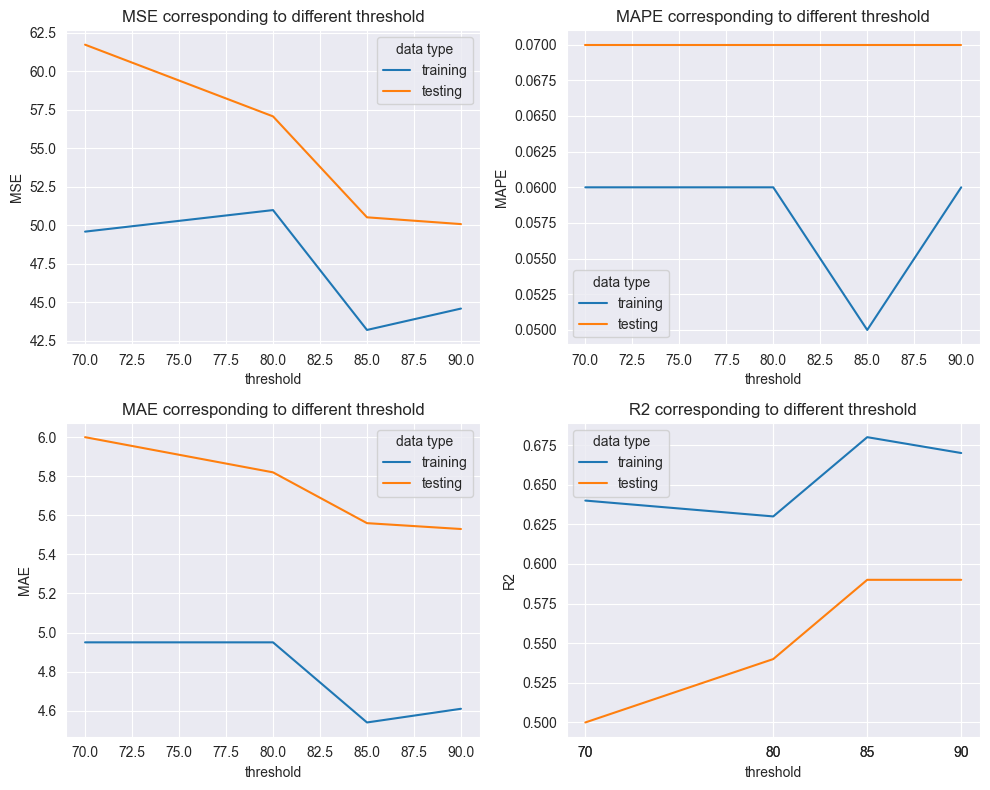

In [4]:
import seaborn as sns
import matplotlib.ticker as ticker

fig, axes = plt.subplots(2, 2, figsize=(10, 8))
axes = axes.flatten()
for i, indicator in enumerate(indicators):
    # axes[i].xaxis.set_major_locator(ticker.MaxNLocator(integer=True))
    target = performance_df[performance_df['indicator'] == indicator]
    sns.lineplot(x='threshold', y='value', data=target, hue='data type', ax=axes[i])
    axes[i].set_title(f"{indicator} corresponding to different threshold")
    axes[i].set_xlabel('threshold')
    axes[i].set_ylabel(indicator)
    plt.xticks(ticks=target['threshold'], labels=target['threshold'].astype(int).astype(str))
    plt.tight_layout()

fig.savefig('anslysis_threshold.png')